In [43]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from numpy import load
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

In [7]:
# Load the X_train, Y_train, X_test and Y_test
X_train = np.load('../data/fnc-1/x_train.npy')
X_test = np.load('../data/fnc-1/x_test.npy')
Y_train = np.load('../data/fnc-1/y_train.npy', allow_pickle=True)
Y_test = load('../data/fnc-1/y_test.npy', allow_pickle=True)

In [8]:
# Converting the labels into int type to prevent unknown type error 
Y_test = Y_test.astype('int')
Y_train = Y_train.astype('int')

In [36]:
# 0 -> agree
# 1 -> disagree
# 2 -> discuss
# 3 -> unrelated
labels = [0, 1, 2, 3]

### Random Forest Classifier

In [10]:
# Random Forest Classifier 
randomForest = RandomForestClassifier(random_state=1)
randomForest.fit(X_train, Y_train)
Y_predictions = randomForest.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, Y_predictions) * 100, "%")
# Getting the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_predictions))
# Precision score
print('Precision Score: ', precision_score(Y_test, Y_predictions, average="micro"))
# Recall score
print('Recall Score: ', recall_score(Y_test, Y_predictions, average="micro"))
print(classification_report(Y_test, Y_predictions))

Accuracy:  86.06225160351 %
Confusion Matrix:
 [[  863     0   793   247]
 [  190     0   282   225]
 [  574     0  3102   788]
 [   90     0   353 17906]]
Precision Score:  0.8606225160351001
Recall Score:  0.8606225160351001
              precision    recall  f1-score   support

           0       0.50      0.45      0.48      1903
           1       0.00      0.00      0.00       697
           2       0.68      0.69      0.69      4464
           3       0.93      0.98      0.95     18349

    accuracy                           0.86     25413
   macro avg       0.53      0.53      0.53     25413
weighted avg       0.83      0.86      0.85     25413



/Users/neeraj/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
randomForestF1 = metrics.f1_score(Y_test, Y_predictions, labels=labels, average=None)
weighted_f1_rf = metrics.f1_score(Y_test, Y_predictions, labels=labels, average='weighted')
print("Weighted F1 Score: %.2f%%" % (weighted_f1_rf * 100.0))
print('Agree F1 Score: %.2f%%' % (randomForestF1[0]*100),'\n'
      'Disagree F1 Score: %.2f%%' % (randomForestF1[1]*100),'\n'
      'Discuss F1 Score: %.2f%%' % (randomForestF1[2]*100),'\n'
      'Unrelated F1 Score: %.2f%%' % (randomForestF1[3]*100))

Weighted F1 Score: 84.61%
Agree F1 Score: 47.68% 
Disagree F1 Score: 0.00% 
Discuss F1 Score: 68.98% 
Unrelated F1 Score: 95.46%


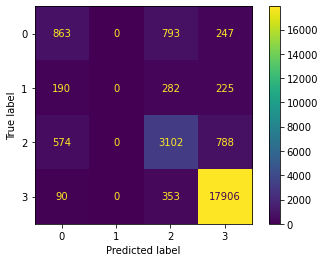

In [46]:
# Plot confusion matrix
plot_confusion_matrix(randomForest, X_test, Y_test)  # doctest: +SKIP
plt.show() 

### Logistic Regression Classifier

In [18]:
# Logitsic Regression Classifier 
logisticRegression = LogisticRegression(solver='saga', multi_class='multinomial')
logisticRegression.fit(X_train, Y_train)
lr_Y_predictions = logisticRegression.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, lr_Y_predictions) * 100, "%")
# Getting the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, lr_Y_predictions))
# Precision score
print('Precision Score: ', precision_score(Y_test, lr_Y_predictions, average="micro"))
# Recall score
print('Recall Score: ', recall_score(Y_test, lr_Y_predictions, average="micro"))
print(classification_report(Y_test, lr_Y_predictions))

Accuracy:  86.11340652421988 %
Confusion Matrix:
 [[  825     0   775   303]
 [  167     3   259   268]
 [  475     0  3038   951]
 [   85     0   246 18018]]
Precision Score:  0.8611340652421988
Recall Score:  0.8611340652421988
              precision    recall  f1-score   support

           0       0.53      0.43      0.48      1903
           1       1.00      0.00      0.01       697
           2       0.70      0.68      0.69      4464
           3       0.92      0.98      0.95     18349

    accuracy                           0.86     25413
   macro avg       0.79      0.53      0.53     25413
weighted avg       0.86      0.86      0.84     25413



In [51]:
logisticF1 = metrics.f1_score(Y_test, lr_Y_predictions, labels=labels, average=None)
weighted_f1_lr = metrics.f1_score(Y_test, lr_Y_predictions, labels=labels, average='weighted')
print("Weighted F1 Score: %.2f%%" % (weighted_f1_lr * 100.0))
print('Agree F1 Score: %.2f%%' % (logisticF1[0]*100),'\n'
      'Disagree F1 Score: %.2f%%' % (logisticF1[1]*100),'\n'
      'Discuss F1 Score: %.2f%%' % (logisticF1[2]*100),'\n'
      'Unrelated F1 Score: %.2f%%' % (logisticF1[3]*100))

Weighted F1 Score: 84.42%
Agree F1 Score: 47.76% 
Disagree F1 Score: 0.86% 
Discuss F1 Score: 69.19% 
Unrelated F1 Score: 95.11%


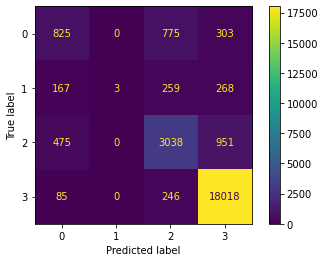

In [44]:
# Plot confusion matrix
plot_confusion_matrix(logisticRegression, X_test, Y_test)  # doctest: +SKIP
plt.show() 

### Gaussian Naive Bayes Classifier

In [21]:
# Gaussian Naive Bayes Classifier 
gaussianNB = GaussianNB()
gaussianNB.fit(X_train, Y_train)
gnb_Y_predictions = gaussianNB.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, gnb_Y_predictions) * 100, "%")
# Getting the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, gnb_Y_predictions))
# Precision score
print('Precision Score: ', precision_score(Y_test, gnb_Y_predictions, average="micro"))
# Recall score
print('Recall Score: ', recall_score(Y_test, gnb_Y_predictions, average="micro"))
print(classification_report(Y_test, gnb_Y_predictions))

Accuracy:  21.740841301695983 %
Confusion Matrix:
 [[ 948  339  328  288]
 [ 302  191   90  114]
 [1774  617 1569  504]
 [8808 1532 5192 2817]]
Precision Score:  0.21740841301695982
Recall Score:  0.21740841301695982
              precision    recall  f1-score   support

           0       0.08      0.50      0.14      1903
           1       0.07      0.27      0.11       697
           2       0.22      0.35      0.27      4464
           3       0.76      0.15      0.26     18349

    accuracy                           0.22     25413
   macro avg       0.28      0.32      0.19     25413
weighted avg       0.59      0.22      0.25     25413



In [53]:
gnbF1 = metrics.f1_score(Y_test, gnb_Y_predictions, labels=labels, average=None)
weighted_f1_gnb = metrics.f1_score(Y_test, gnb_Y_predictions, labels=labels, average='weighted')
print("Weighted F1 Score: %.2f%%" % (weighted_f1_gnb * 100.0))
print('Agree F1 Score: %.2f%%' % (gnbF1[0]*100),'\n'
      'Disagree F1 Score: %.2f%%' % (gnbF1[1]*100),'\n'
      'Discuss F1 Score: %.2f%%' % (gnbF1[2]*100),'\n'
      'Unrelated F1 Score: %.2f%%' % (gnbF1[3]*100))

Weighted F1 Score: 24.51%
Agree F1 Score: 13.80% 
Disagree F1 Score: 11.32% 
Discuss F1 Score: 26.95% 
Unrelated F1 Score: 25.53%


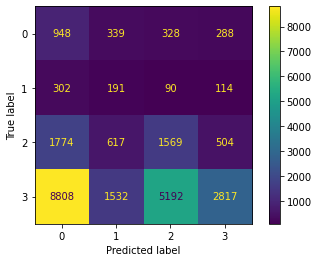

In [47]:
# Plot confusion matrix
plot_confusion_matrix(gaussianNB, X_test, Y_test)  # doctest: +SKIP
plt.show() 

### Bernoulli Naive Bayes Classifier

In [26]:
# Bernoulli Naive Bayes Classifier 
bernoilliNB = BernoulliNB()
bernoilliNB.fit(X_train, Y_train)
bnb_Y_predictions = bernoilliNB.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, gnb_Y_predictions) * 100, "%")
# Getting the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, bnb_Y_predictions))
# Precision score
print('Precision Score: ', precision_score(Y_test, bnb_Y_predictions, average="micro"))
# Recall score
print('Recall Score: ', recall_score(Y_test, bnb_Y_predictions, average="micro"))
print(classification_report(Y_test, bnb_Y_predictions))

Accuracy:  21.740841301695983 %
Confusion Matrix:
 [[ 1054    67   198   584]
 [  277    46    45   329]
 [ 1292   147  1071  1954]
 [ 3494   344  2809 11702]]
Precision Score:  0.545901703852359
Recall Score:  0.545901703852359
              precision    recall  f1-score   support

           0       0.17      0.55      0.26      1903
           1       0.08      0.07      0.07       697
           2       0.26      0.24      0.25      4464
           3       0.80      0.64      0.71     18349

    accuracy                           0.55     25413
   macro avg       0.33      0.37      0.32     25413
weighted avg       0.64      0.55      0.58     25413



In [29]:
bnbF1 = metrics.f1_score(Y_test, bnb_Y_predictions, labels=labels, average=None)
weighted_f1_bnb = metrics.f1_score(Y_test, bnb_Y_predictions, labels=labels, average='weighted')
print("Weighted F1 Score: %.2f%%" % (weighted_f1_bnb * 100.0))
print('Agree F1 Score: %.2f%%' % (bnbF1[0]*100),'\n'
      'Disagree F1 Score: %.2f%%' % (bnbF1[1]*100),'\n'
      'Discuss F1 Score: %.2f%%' % (bnbF1[2]*100),'\n'
      'Agree F1 Score: %.2f%%' % (bnbF1[3]*100))

Weighted F1 Score: 57.88%
Agree F1 Score: 26.28% 
Disagree F1 Score: 7.07% 
Discuss F1 Score: 24.94% 
Agree F1 Score: 71.10%


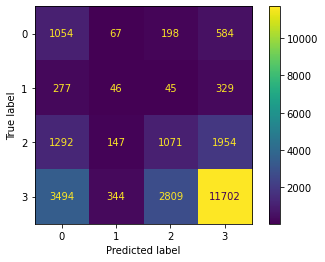

In [48]:
# Plot confusion matrix
plot_confusion_matrix(bernoilliNB, X_test, Y_test)  # doctest: +SKIP
plt.show() 

### Decision Tree Classifier

In [30]:
# Decision Tree Classifier 
decisionTree = DecisionTreeClassifier(random_state=1)
decisionTree.fit(X_train, Y_train )
dt_Y_predictions = decisionTree.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, dt_Y_predictions) * 100, "%")
# Getting the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, dt_Y_predictions))
# Precision score
print('Precision Score: ', precision_score(Y_test, dt_Y_predictions, average="micro"))
# Recall score
print('Recall Score: ', recall_score(Y_test, dt_Y_predictions, average="micro"))
print(classification_report(Y_test, dt_Y_predictions))

Accuracy:  79.53803171605084 %
Confusion Matrix:
 [[  766    34   905   198]
 [  225    31   258   183]
 [ 1121    94  2615   634]
 [  477    71  1000 16801]]
Precision Score:  0.7953803171605084
Recall Score:  0.7953803171605084
              precision    recall  f1-score   support

           0       0.30      0.40      0.34      1903
           1       0.13      0.04      0.07       697
           2       0.55      0.59      0.57      4464
           3       0.94      0.92      0.93     18349

    accuracy                           0.80     25413
   macro avg       0.48      0.49      0.48     25413
weighted avg       0.80      0.80      0.80     25413



In [31]:
dtF1 = metrics.f1_score(Y_test, dt_Y_predictions, labels=labels, average=None)
weighted_f1_dt = metrics.f1_score(Y_test, dt_Y_predictions, labels=labels, average='weighted')
print("Weighted F1 Score: %.2f%%" % (weighted_f1_dt * 100.0))
print('Agree F1 Score: %.2f%%' % (dtF1[0]*100),'\n'
      'Disagree F1 Score: %.2f%%' % (dtF1[1]*100),'\n'
      'Discuss F1 Score: %.2f%%' % (dtF1[2]*100),'\n'
      'Agree F1 Score: %.2f%%' % (dtF1[3]*100))

Weighted F1 Score: 79.76%
Agree F1 Score: 34.11% 
Disagree F1 Score: 6.69% 
Discuss F1 Score: 56.59% 
Agree F1 Score: 92.91%


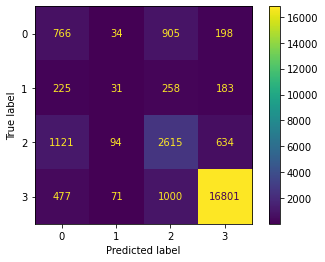

In [49]:
# Plot confusion matrix
plot_confusion_matrix(decisionTree, X_test, Y_test)  # doctest: +SKIP
plt.show() 

In [ ]:
# # LinearSVC Classifier 
# linearSVC = LinearSVC(multi_class='crammer_singer', C=0.5)
# linearSVC.fit(X_train, Y_train )
# lsvc_Y_predictions = linearSVC.predict(X_test)
# print('Accuracy: ', accuracy_score(Y_test, lsvc_Y_predictions) * 100, "%")
# # Getting the confusion matrix
# print('Confusion Matrix:\n', confusion_matrix(Y_test, lsvc_Y_predictions))
# # Precision score
# print('Precision Score: ', precision_score(Y_test, lsvc_Y_predictions, average="micro"))
# # Recall score
# print('Recall Score: ', recall_score(Y_test, lsvc_Y_predictions, average="micro"))
# print(classification_report(Y_test, lsvc_Y_predictions))

### MLP Classifier

In [32]:
# MLP Classifier(Neural Net)
mlpClassifier = MLPClassifier(random_state=1)
mlpClassifier.fit(X_train, Y_train)
mlp_Y_predictions = mlpClassifier.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, mlp_Y_predictions) * 100, "%")
# Getting the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, mlp_Y_predictions))
# Precision score
print('Precision Score: ', precision_score(Y_test, mlp_Y_predictions, average="micro"))
# Recall score
print('Recall Score: ', recall_score(Y_test, mlp_Y_predictions, average="micro"))
print(classification_report(Y_test, mlp_Y_predictions))

Accuracy:  76.49628143076377 %
Confusion Matrix:
 [[  808    10   928   157]
 [  184     6   373   134]
 [  869    19  3025   551]
 [  884    42  1822 15601]]
Precision Score:  0.7649628143076378
Recall Score:  0.7649628143076378
              precision    recall  f1-score   support

           0       0.29      0.42      0.35      1903
           1       0.08      0.01      0.02       697
           2       0.49      0.68      0.57      4464
           3       0.95      0.85      0.90     18349

    accuracy                           0.76     25413
   macro avg       0.45      0.49      0.46     25413
weighted avg       0.80      0.76      0.77     25413



In [33]:
mlpF1 = metrics.f1_score(Y_test, mlp_Y_predictions, labels=labels, average=None)
weighted_f1_mlp = metrics.f1_score(Y_test, mlp_Y_predictions, labels=labels, average='weighted')
print("Weighted F1 Score: %.2f%%" % (weighted_f1_mlp * 100.0))
print('Agree F1 Score: %.2f%%' % (mlpF1[0]*100),'\n'
      'Disagree F1 Score: %.2f%%' % (mlpF1[1]*100),'\n'
      'Discuss F1 Score: %.2f%%' % (mlpF1[2]*100),'\n'
      'Agree F1 Score: %.2f%%' % (mlpF1[3]*100))

Weighted F1 Score: 77.41%
Agree F1 Score: 34.77% 
Disagree F1 Score: 1.55% 
Discuss F1 Score: 57.01% 
Agree F1 Score: 89.68%


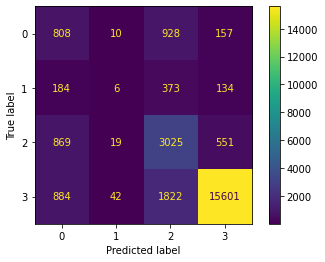

In [50]:
# Plot confusion matrix
plot_confusion_matrix(mlpClassifier, X_test, Y_test)  # doctest: +SKIP
plt.show() 

### Final Summary of various classifiers

In [34]:
models_list = ['Random Forest', 'Logistic Regression', 'Gaussian NB', 'Bernoulli NB', 'Decision Tree', 'MLP']
rf_accuracy = accuracy_score(Y_test, Y_predictions) * 100 
lr_accuracy = accuracy_score(Y_test, lr_Y_predictions) * 100
gnb_accuracy = accuracy_score(Y_test, gnb_Y_predictions) * 100
bnb_accuracy = accuracy_score(Y_test, bnb_Y_predictions) * 100
dt_accuracy = accuracy_score(Y_test, dt_Y_predictions) * 100
# lsvc_accuracy = accuracy_score(Y_test, lsvc_Y_predictions) * 100
mlp_accuracy = accuracy_score(Y_test, mlp_Y_predictions) * 100
models_accuracy = [rf_accuracy, lr_accuracy, gnb_accuracy, bnb_accuracy, dt_accuracy, mlp_accuracy]
summary = {'model': models_list, 'accuracy': models_accuracy}
models_summary = pd.DataFrame(summary)
models_summary.set_index('model', inplace=True)
models_summary.index.name = None

In [35]:
models_summary 

,accuracy
Random Forest,86.062252
Logistic Regression,86.113407
Gaussian NB,21.740841
Bernoulli NB,54.590170
Decision Tree,79.538032
MLP,76.496281
